Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

In [43]:
#!pip install ISLP
from ISLP import load_data
weekly = load_data('Weekly')

print(weekly.head())

print(weekly.info())
print(weekly.describe())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1089 non-null   int64   
 1   Lag1       1089 non-null   float64 
 2   Lag2       1089 non-null   float64 
 3   Lag3       1089 non-null   float64 
 4   Lag4       1089 non-null   float64 
 5   Lag5       1089 non-null   float64 
 6   Volume     1089 non-null   float64 
 7   Today      1089 non-null   float64 
 8   Direction  1089 non-null   category
dtypes: category(1), fl

<Axes: xlabel='Today', ylabel='Count'>

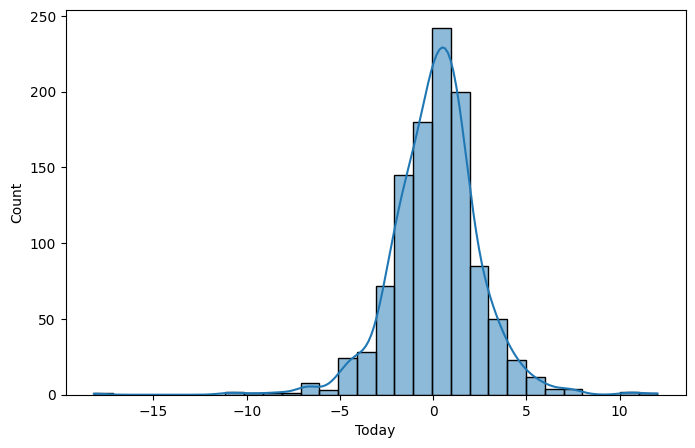

In [44]:
#Distribution of Weekly Returns
plt.figure(figsize=(8,5))
sns.histplot(weekly['Today'], bins=30, kde=True)

Plotting the distribution of weekly returns shows that most of the returns are concentrated around 0. There does appear to be a few outliers on the outskirts of the distribution.

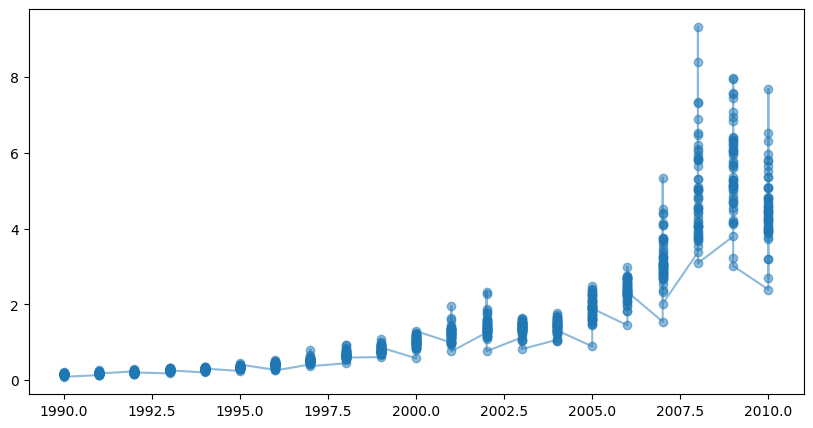

In [73]:
plt.figure(figsize=(10,5))
plt.plot(weekly['Year'], weekly['Volume'], marker='o', alpha=0.5)

When we plot the trading volume over time, we can see that the volume has grown a significant amount over time. The graph indicates a rapid growth of the market, starting roughly near 2002.

Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [45]:
weekly['Direction'] = (weekly['Direction'] == 'Up').astype(int)
X = weekly[['Lag1', 'Lag2','Lag3','Lag4','Lag5','Volume']]
Y = weekly['Direction']
X = sm.add_constant(X)

In [46]:
logit_model = sm.Logit(Y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Mar 2025   Pseudo R-squ.:                0.006580
Time:                        23:49:25   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

When looking at the p-values for the logistic model summary, the variable lag2 appears to be a statistically significant predictor. All of the other predictors have a p-value greater than 0.05. However, when you look at the pseudo-R-squared of 0.006, we see that this model only accounts for a very small amount of the variability in returns based on this set of predictors.

Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [47]:
Y_pred = logit_model.predict(X) > 0.5
conf_matrix = confusion_matrix(Y, Y_pred)
accuracy = accuracy_score(Y, Y_pred)
print(conf_matrix)
print(accuracy)

[[ 54 430]
 [ 48 557]]
0.5610651974288338


When looking at our confusion matrix, we can see the true positive, false positive, true negative, and false negative rates of the model. Our overall accuracy is 56%, where 50% represents random guessing. Looking at the matrix, we see that the model predicted 430 false positives. (up when actually down)
Additionally, the model has a true negative count of 54, which means it is struggling to correctly identify when the market will decrease. This is consistent with the high false positive rate mentioned. Overall, the model is predicting up too much.


 Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [48]:
train_data = weekly[weekly['Year'] <= 2008]
test_data = weekly[weekly['Year'] > 2008]
#test_data.head()
#train_data.head()
X_train = train_data['Lag2']
Y_train = train_data['Direction']

X_test = test_data['Lag2']
Y_test = test_data['Direction']
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


logit_model = sm.Logit(Y_train, X_train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Mar 2025   Pseudo R-squ.:                0.003076
Time:                        23:49:25   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [49]:
Y_pred_probs = logit_model.predict(X_test)
Y_pred = (Y_pred_probs > 0.5).astype(int)
accuracy2 = accuracy_score(Y_test, Y_pred)
conf_matrix2 = confusion_matrix(Y_test, Y_pred)

In [50]:
print(conf_matrix2)
print(accuracy2)

[[ 9 34]
 [ 5 56]]
0.625


When we fit the logistic model to the training data with lag2 as the only predictor, we get a similar result, with a p-value lower than 0.05. However, the R-squared for the model is still very very low, indicating the model does not explain the variability in the direction of return. The correlation matrix shows us that the model is making a lot of false negatives, meaning it is predicting down when actually up.

LDA

In [51]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
Y_pred_lda = lda.predict(X_test)

In [52]:
conf_matrix_lda = confusion_matrix(Y_test, Y_pred_lda)
print(conf_matrix_lda)
accuracy_lda = accuracy_score(Y_test, Y_pred_lda)
print(accuracy_lda)

[[ 9 34]
 [ 5 56]]
0.625


When we use LDA on the training data, we obtain the same results as the logistic regression.

KNN

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data[['Lag2']])
X_test_scaled = scaler.transform(test_data[['Lag2']])
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, Y_train)
knn_y_pred = knn.predict(X_test_scaled)



conf_matrix_knn = confusion_matrix(Y_test, knn_y_pred)
print(conf_matrix_knn)

[[22 21]
 [32 29]]


In [54]:
knn_accuracy = accuracy_score(Y_test, knn_y_pred)
print(knn_accuracy)

0.49038461538461536


 Which of these methods appears to provide the best results on this data?



In [55]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.21      0.32        43
           1       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104



In [56]:
print(classification_report(Y_test, Y_pred_lda))

              precision    recall  f1-score   support

           0       0.64      0.21      0.32        43
           1       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104



In [57]:
print(classification_report(Y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.41      0.51      0.45        43
           1       0.58      0.48      0.52        61

    accuracy                           0.49       104
   macro avg       0.49      0.49      0.49       104
weighted avg       0.51      0.49      0.49       104



When looking at the summaries of all three models, we get very similar results for LDA and logistic regression. These models have a high recall for "1", aka Direction: Up. This means they correctly predict most of the time the market will increase. Out of all actual positive cases, the LDA and logistic models catch 92% of them. However, both of these models are poor at predicting when the market will decrease, as reflected in their recall for 0, 0.21. This means that they are missing most of the down cases. However, the overall accuracy of the model is roughly ~63%, which might be considered good in certain industries.

The summary of the KNN model is a little different. The overall accuracy of KNN model is 49%, meaning it is worse than random guessing. Additionally, the recalls for both 0 and 1 predictions are low, meaning the model is not doing a good job at correctly identifying neither market increases, nor market decreases. The KNN model appears to be the weakest overall, likely due to k=1 causing overfitting to noise in the data.

J) Adjusting K & predictors

In [59]:
X_j_train = train_data[['Lag1', 'Lag2']]
Y_j_train = train_data['Direction']
X_j_test = test_data[['Lag1', 'Lag2']]
Y_j_test = test_data['Direction']
X_j_train = sm.add_constant(X_train)
X_j_test = sm.add_constant(X_test)

In [62]:
logit_j_model = sm.Logit(Y_j_train, X_j_train).fit()
Y_pred_j = (logit_model.predict(X_test) > 0.5).astype(int)

j_conf_matrix = confusion_matrix(Y_j_test, Y_pred_j)
j_accuracy = accuracy_score(Y_j_test, Y_pred_j)

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


In [63]:
print(j_conf_matrix)
print(j_accuracy)

[[ 9 34]
 [ 5 56]]
0.625


When we add a second predictor, lag1, the accuracy of the model remains the same. This means that adding this second predictor did not add much predictive power. The false negative rate is still high as well.

In [67]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_scaled, Y_train)

knn3_y_pred = knn_3.predict(X_test_scaled)

cm_knn_3 = confusion_matrix(Y_test, knn3_y_pred)
print(cm_knn_3)


[[16 27]
 [18 43]]


When we adjust the number of neighbors in our model, we notice some changes. The number of true positives increased, meaning the model is correctly predicting up more often than before. Similarly, the false positive rate decreased. However, the number of false negatives also increased, meaning the model is missing more up predictions than before.